In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('../input/advanced-dls-spring-2021/train.csv')
train_df.head(3)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [4]:
test_df = pd.read_csv('../input/advanced-dls-spring-2021/test.csv')
test_df.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


## 2  Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [5]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Изучение данных

* Посмотрю на пропуски NaN

* Приведу к нормальному типу данные

* Выделю категориальные данные

* Выделю целивой признак



In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

#### Вывод пропусков нет

### Анализ дубликатов

In [7]:
train_df.duplicated().sum()# подсчёт явных дубликатов

14

In [8]:
train_df = train_df.drop_duplicates() 
train_df.duplicated().sum()

0

### Функция для анализа DataFrame

In [9]:
class DataScience:
    
    def __init__(self, grade=123):  # *args, **kwargs
        self.description_DataScience = grade
        
    def readmi(df):
        print("Описание функций и методов")
        print("distribution_features")
        print("                     Как признаки распределяются в DataFrame т.е что бы увидеть анамальные значения. Передаются df, СПИСОК Признаков и порядок сортировки bool_sort=False или True")
        print("nomber_columns__plot ")
        print("                     Зависимость признаков числовых от целевого, передается df и целевой признак")
        print("object_columns_plot")
        print("                     Зависимость признаков object от целевого , передается df и целевой признак")      
        print("nan_procent")
        print("                     анализирую процент пропусков    NaN, передается df")      
        print("analiz_df")
        print("                     выводится таблица describe и корреляция")      
        print("AntiMissings")
        print("                     Заменяю пропуски во всей таблице, автоматически анализирует тип данных и если что заменяет на среднию и Unknown")
        print('replase_values_columns_nan_median')
        print("                     Заменяю пропуске в признаке на медиану по значению другого признака, передается df, признак который нужно обработать и признаки на основании которого будет групировать и заменять")    
    
        print("replase_values_columns_nan_mean")
        print("                     Заменяю пропуске в признаке на среднию по значению другого признака, передается df, признак который нужно обработать и признаки на основании которого будет групировать и заменять")    
    
        print("replase_values_nan_null")
        print("                     Заменяю пропуске в признаке на нуль")
        print("replase_values_nan_unknow")
        print("                     Заменяю пропуске в признаке на unknow")
        print("replase_values_nan_mean")
        print("                     Заменяю пропуске в признаке на среднее в этом признаке ")
        print("delet_nan")
        print("                     Удалю пропуски в признаке ")
        
    # Как признаки распределяются в DataFrame т.е что бы увидеть анамальные значения
    def distribution_features(self,row,columns,bool_sort):
        for i in columns:
            print('Рассматриваем признак',i)
            row[i].hist()
            if row[i].dtype!="object":
            
                display(row[i].describe())
                #data=row[i].unique()
                print("Уникальные значения признака",i)
                display(row[i].sort_values(ascending=bool_sort).unique())
            if len(row[i].sort_values().unique())<10:
                    #ax.pie(row[i].value_counts(), autopct="%1.1f%%", labels=row[i].value_counts().index)
                    fig, ax = plt.subplots()
                    ax.pie(row[i].value_counts(), labels=row[i].value_counts().index)
                    plt.show()   
                
            else:
                print("Уникальные значения признака",i)
                display(row[i].sort_values().unique())
 ######################           
                if len(row[i].sort_values().unique())<10:
                    #ax.pie(row[i].value_counts(), autopct="%1.1f%%", labels=row[i].value_counts().index)
                    fig, ax = plt.subplots()
                    ax.pie(row[i].value_counts(), labels=row[i].value_counts().index)
                    plt.show()
                
            plt.show()
        
        
        
    # Зависимость признаков числовых от целевого      
    def nomber_columns__plot(self,row,columns_target):
        # Определяю численые признаки
        num_columns = row.dtypes[row.dtypes!="object"].index.values
        # Чищу список, что бы целевой признак не попадался
        target=columns_target #Задаю целевой признак
        new_num_columns=[]
        
        
        for i in num_columns:
            if i==target:
                i=i
            else:
                new_num_columns.append(i)
        new_num_columns
        for i in new_num_columns:
            nomber_unikue=row[i].unique()  # Можно добавить проверку на кол-во переменных, если например меньше 8 тогда строить график df['sdfsdf'].hist() 
        # потому что так так лучше видно плотность распределения
            nomber_unikue1=len(nomber_unikue)
            if(nomber_unikue1>3):
                row.pivot_table(index=i,values=columns_target,aggfunc='mean').plot()
                plt.show()
            else:
                row[i].hist()
                print(i)
                
            
       
            
    # Зависимость признаков object от целевого        
    def object_columns_plot(self,row,columns_target):
        # Определяю численые признаки
        num_columns = row.dtypes[row.dtypes=="object"].index.values
        # Чищу список, что бы целевой признак не попадался
        target=columns_target #Задаю целевой признак

        new_num_columns=[]


        for i in num_columns:
            if i==target:
                i=i
            else:
                new_num_columns.append(i)
        new_num_columns
        for i in new_num_columns:

            row.pivot_table(index=i,values=columns_target,aggfunc='mean').plot()
            plt.show()         
            
     # анализирую процент пропусков    NaN   
    def nan_procent(self,row):
        total = row.isnull().sum().sort_values(ascending=False)
        percent = (row.isnull().sum()/row.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data['Data Type'] = row.dtypes
        return missing_data
    
    
    # Анализ DataFrame        
    def analiz_df(self,row):
        import seaborn as sns
        print("===================================Таблица describe====================")
        display(row.describe())
        print("===================================Таблица корреляции==================")
        plt.figure(figsize=(12, 10), dpi=80)
        sns.heatmap(row.corr(), xticklabels=row.corr().columns, yticklabels=row.corr().columns, cmap='RdYlGn', center=0,
                    annot=True)
        plt.title('Диаграмма корреляции', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        print("===================================Кол-во дубликатов ==================")
        print("Кол-во дубликатов ",row.duplicated().sum())
        
     # заменяю пропуски во всех столбцах на среднию или Unknown
    def AntiMissings(row):
        df1 = row.copy()
        for col in df1.columns:
                if df1[col].dtype == "object":
                    df1[col] = df1[col].fillna("Unknown")
                    df1[col] = df1[col].astype("object")
                else:
                    df1[col] = df1[col].fillna(np.mean(df1[col]))
        return df1    
        
    # Заменяю пропуске в признаке на медиану по значению другого признака    
    def replase_values_columns_nan_median(self,row,target,columns):
        row[target] = row[target].fillna(row.groupby([columns])[target].transform('median'))
        return row
     # Заменяю пропуске в признаке на среднее по значению другого признака    
    def replase_values_columns_nan_mean(self,row,target,columns):
        row[target] = row[target].fillna(row.groupby([columns])[target].transform('mean'))
        return row
     # Заменяю пропуске в признаке на нуль 
    def replase_values_nan_null(self,row,target):
        row[target] = row[target].fillna(0)
        return row
     # Заменяю пропуске в признаке на unknow 
    def replase_values_nan_unknow(self,row,target):
        row[target] = row[target].fillna('unknow')
        return row
 
     # Заменяю пропуске в признаке на среднее в этом признаке 
    def replase_values_nan_mean(self,row,target):
        row[target] = row[target].fillna(row[target].mean())
        return row
    # Удалю пропуски в признаке
    def delet_nan(self,row,target):
        # Удалю пропуски
        row=row.dropna(subset=[target])
        
        
DataScience = DataScience()    

Рассматриваем признак ClientPeriod


count    5268.000000
mean       32.480448
std        24.529439
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: ClientPeriod, dtype: float64

Уникальные значения признака ClientPeriod


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

Уникальные значения признака ClientPeriod


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

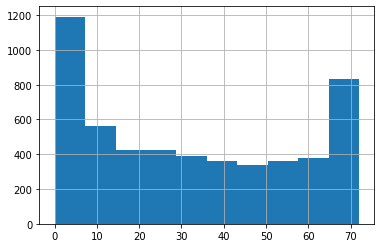

Рассматриваем признак MonthlySpending


count    5268.000000
mean       64.977563
std        30.176025
min        18.250000
25%        35.537500
50%        70.450000
75%        90.050000
max       118.750000
Name: MonthlySpending, dtype: float64

Уникальные значения признака MonthlySpending


array([ 18.25,  18.4 ,  18.7 , ..., 118.6 , 118.65, 118.75])

Уникальные значения признака MonthlySpending


array([ 18.25,  18.4 ,  18.7 , ..., 118.6 , 118.65, 118.75])

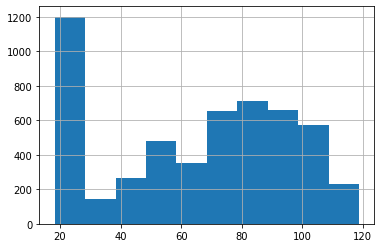

Рассматриваем признак TotalSpent
Уникальные значения признака TotalSpent


array([' ', '100.2', '100.25', ..., '997.65', '998.1', '999.9'],
      dtype=object)

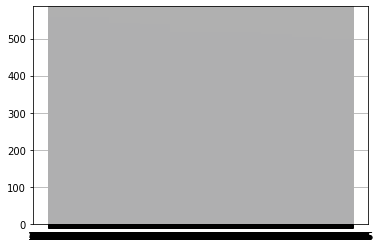

Рассматриваем признак Sex


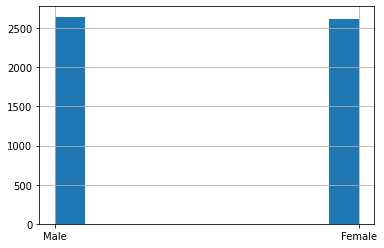

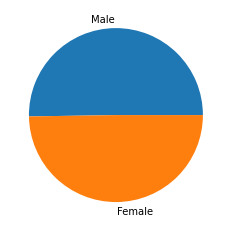

Рассматриваем признак IsSeniorCitizen


count    5268.000000
mean        0.159643
std         0.366310
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: IsSeniorCitizen, dtype: float64

Уникальные значения признака IsSeniorCitizen


array([0, 1])

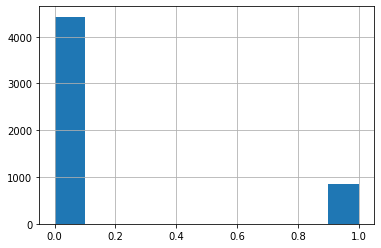

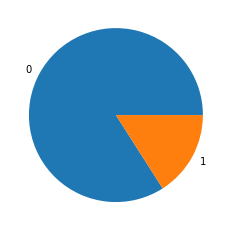

Рассматриваем признак HasPartner


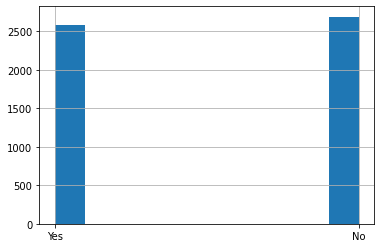

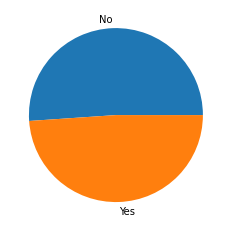

Рассматриваем признак HasChild


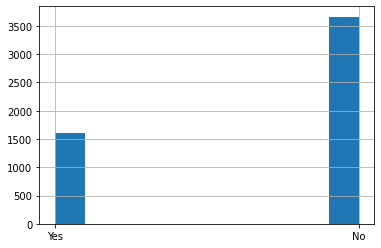

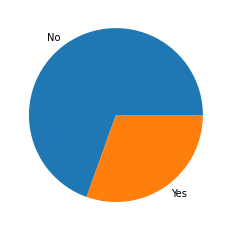

Рассматриваем признак HasPhoneService


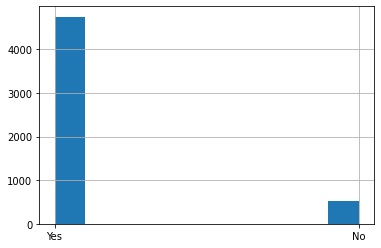

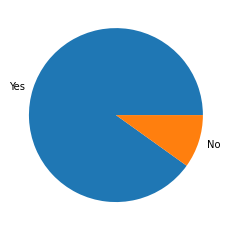

Рассматриваем признак HasMultiplePhoneNumbers


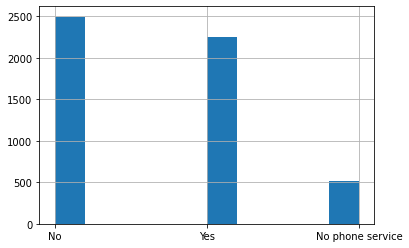

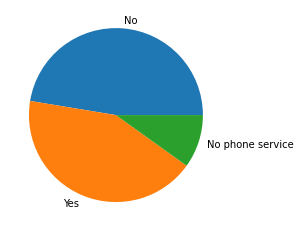

Рассматриваем признак HasInternetService


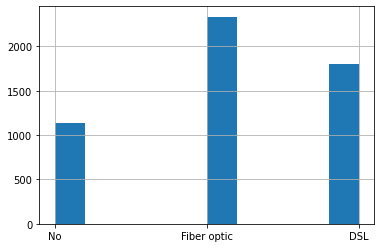

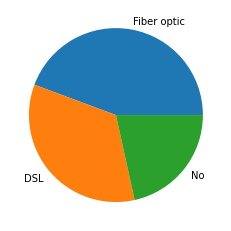

Рассматриваем признак HasOnlineSecurityService


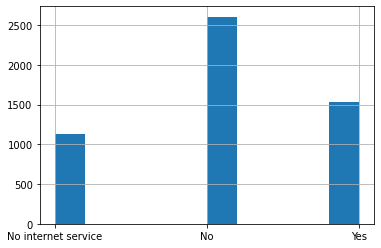

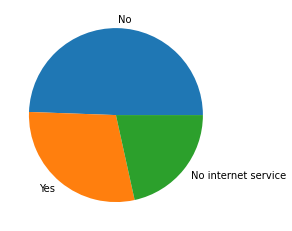

Рассматриваем признак HasOnlineBackup


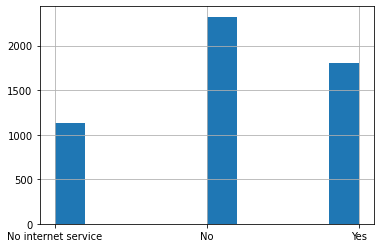

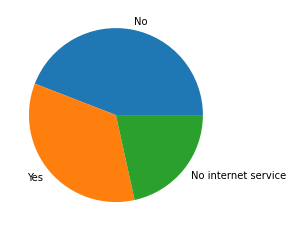

Рассматриваем признак HasDeviceProtection


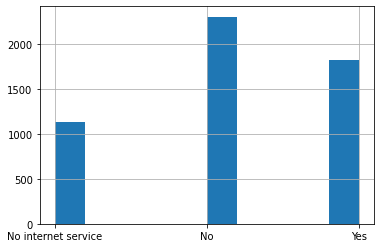

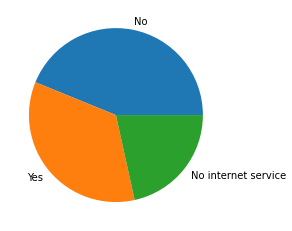

Рассматриваем признак HasTechSupportAccess


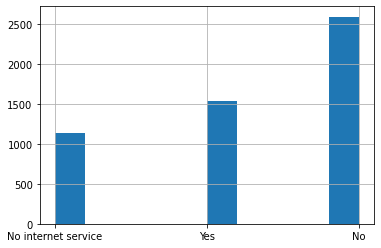

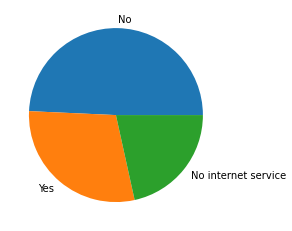

Рассматриваем признак HasOnlineTV


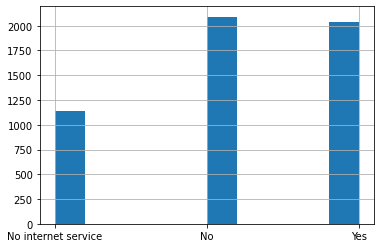

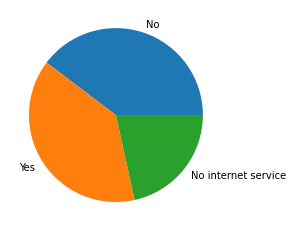

Рассматриваем признак HasMovieSubscription


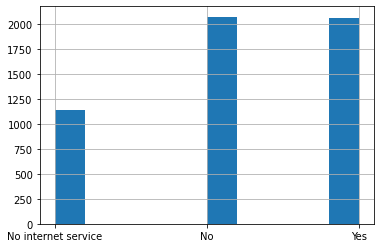

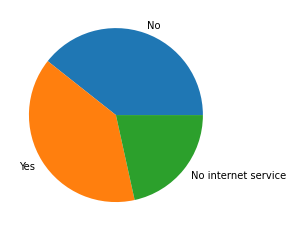

Рассматриваем признак HasContractPhone


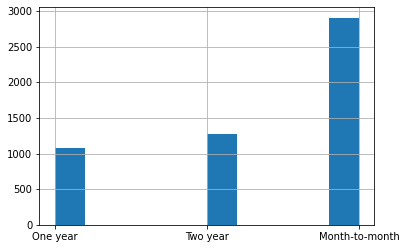

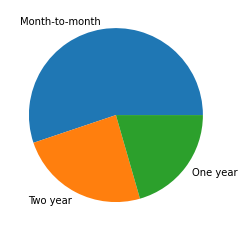

Рассматриваем признак IsBillingPaperless


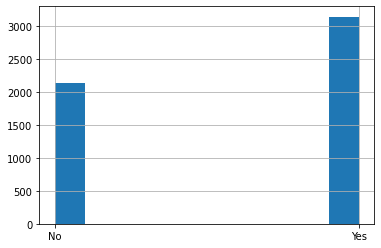

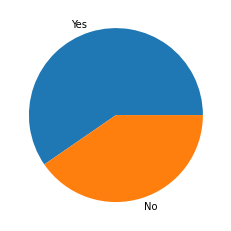

Рассматриваем признак PaymentMethod


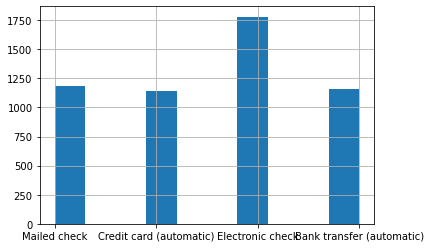

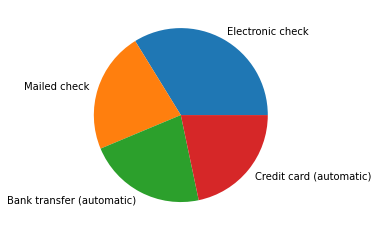

Рассматриваем признак Churn


count    5268.000000
mean        0.260820
std         0.439124
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

Уникальные значения признака Churn


array([0, 1])

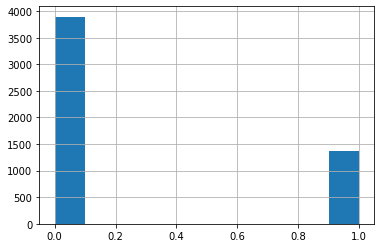

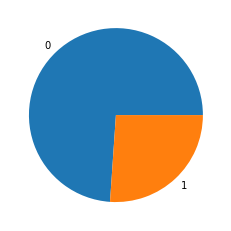

In [10]:
DataScience.distribution_features(train_df,train_df.columns,True)

In [11]:
test_df['TotalSpent'].sort_values().unique()

array([' ', '100.8', '1001.2', ..., '997.75', '999.45', '999.8'],
      dtype=object)

In [12]:
# Как видно в признаке TotalSpent имеются пропуски в виде " ". Уберу данные пропуски
train_df['TotalSpent']=train_df['TotalSpent'].replace(' ','0')
train_df = train_df.astype({'TotalSpent': np.float})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Как видно в признаке TotalSpent имеются пропуски в виде " ". Уберу данные пропуски
test_df['TotalSpent']=test_df['TotalSpent'].replace(' ','0')
test_df = test_df.astype({'TotalSpent': np.float})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

## 3  Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### 3.1  Нормирование числовых признаков

In [17]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
scaler = StandardScaler()
X_train_scaled=train_df.copy()

X_train_scaled[num_cols] = scaler.fit_transform(train_df[num_cols])
#X_test_scaled = scaler.transform(test_df[num_cols]) # Обрати внимание на разные функции, что бы не было утечек

In [18]:
X_train_scaled.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0.918149,-1.507219,-0.558463,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,1.611260,-1.296767,-0.185661,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,-1.283496,0.361992,-0.977368,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


### 3.2  one-hot-encoding'а.

In [19]:
# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [20]:
dummy_features = pd.get_dummies(train_df[cat_cols])

In [21]:
X = pd.concat([X_train_scaled[num_cols], dummy_features], axis=1)
X.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.918149,-1.507219,-0.558463,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.611260,-1.296767,-0.185661,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.283496,0.361992,-0.977368,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [22]:
y=train_df['Churn']

### 3.3  Подбор гиперпараметров при помощи Кроссвалидации

In [23]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=False,
                           refit=True) #refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of roc_auc', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
models = [KNeighborsClassifier()]
param_names = ['n_neighbors']  # Параметры
grids = [np.array(np.linspace(4, 30, 8), dtype='int')] # Значение
param_scales = ['log', 'ordinary']

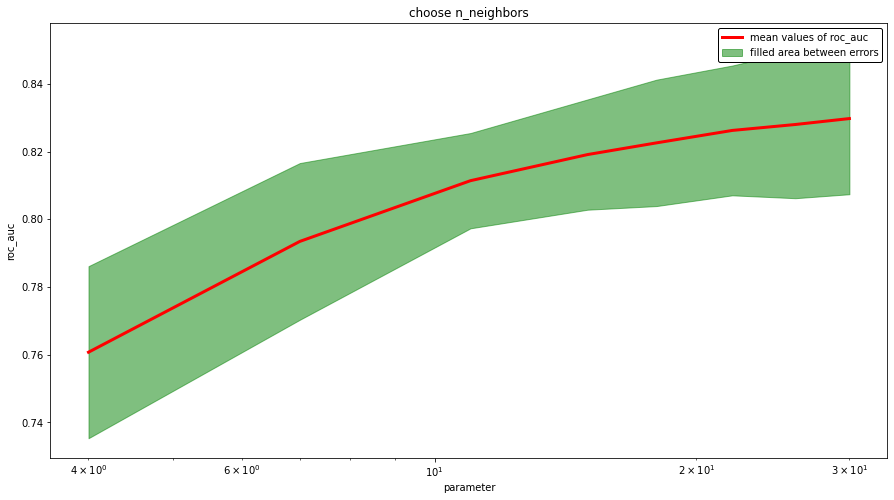

(array([0.76074971, 0.79349071, 0.81143976, 0.81915725, 0.82261042,
        0.82628586, 0.82803842, 0.82979389]),
 array([0.01271074, 0.01157727, 0.00703927, 0.00814855, 0.0093377 ,
        0.00958887, 0.01089092, 0.01118073]))

In [26]:
search_and_draw(X, y, KNeighborsClassifier(), 'n_neighbors', 
                np.array(np.linspace(4, 30, 8), dtype='int'), 'log')

In [27]:
grids = [np.array(np.linspace(4, 30, 8), dtype='int')]
param_names = ['n_neighbors']
parameters = {'n_neighbors': range(4, 30, 8)}

CV_model = GridSearchCV(estimator=KNeighborsClassifier(), 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            #verbose=10,
                           refit=True)
CV_model.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(4, 30, 8)}, scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [28]:
print('Лучшее значение n_neighbors=',CV_model.best_params_['n_neighbors'])

Лучшее значение n_neighbors= 28


In [29]:
print('Лучшее значение ROC-AUC=',CV_model.best_score_)

Лучшее значение ROC-AUC= 0.8289690790163737


## 4  Применение градиентного бустинга (2 балла)
Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### 4.1  Раaзделю выборки на валидную и тестовую

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_features = train_df.drop(['Churn'], axis=1) # извлеките признаки 
y_target = train_df['Churn']

In [32]:
X_features_train, features_test, target_train, target_test = train_test_split(X_features, y_target, 
                                                                              test_size=0.4, 
                                                                              random_state=12345)

In [33]:
from catboost import CatBoostClassifier

In [34]:
from catboost import CatBoostClassifier
params = {'depth': [2, 8],
          'learning_rate': [0.03, 0.1, 0.15]
          #,'l2_leaf_reg': [1, 4, 9]
          #,'iterations': [300, 500]
         }
cb = CatBoostClassifier(cat_features=cat_cols,verbose=False)

In [35]:
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv=5,n_jobs=-1, 
                            verbose=False,
                           refit=True)
cb_model.fit(X_features_train, target_train)
 # Посмотреть лучший результат
best_score1=cb_model.best_score_
best_params1=cb_model.best_params_
print(cb_model.best_score_)  
 # Просмотр лучших параметров
print(cb_model.best_params_) 

0.8452898360752801
{'depth': 2, 'learning_rate': 0.03}


In [36]:
print('Лучшее значение roc_auc=',cb_model.best_score_)

Лучшее значение roc_auc= 0.8452898360752801


In [37]:
print('Лучшее значение гиперпараметров',cb_model.best_params_) 

Лучшее значение гиперпараметров {'depth': 2, 'learning_rate': 0.03}


#### Тестирую на тестовых данных

In [38]:
preds_proba = cb_model.predict_proba(features_test)

In [39]:
from sklearn.metrics import roc_auc_score
roc__auc_preds_proba = roc_auc_score(target_test, preds_proba[:,1])
print('На тестовой выборке значение roc_auc=',roc__auc_preds_proba)

На тестовой выборке значение roc_auc= 0.8451651264915914


In [40]:
model=CatBoostClassifier(depth=cb_model.best_params_['depth'],learning_rate=cb_model.best_params_['learning_rate'],cat_features=cat_cols,verbose=False)

In [62]:
model.fit(X_features, y_target)

In [64]:
X_test = test_df

submission = pd.read_csv('../input/advanced-dls-spring-2021/submission.csv')#,index_col=False)

#submission['Churn'] = model.predict_proba(X_test)[:,1]
#submission['Churn'] = model.predict(X_test)
#submission.to_csv('../input/advanced-dls-spring-2021/my_submission.csv',index=False)

In [65]:

submission['Churn'] = model.predict_proba(X_test)[:,1]

In [70]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1761 non-null   int64  
 1   Churn   1761 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.6 KB


In [69]:
submission.head(25)

,Id,Churn
0,0,0.036255
1,1,0.724179
2,2,0.674036
3,3,0.012255
4,4,0.005205
5,5,0.100876
6,6,0.452754
7,7,0.248272
8,8,0.046929
9,9,0.406659


In [71]:
submission.to_csv("/kaggle/working/submission.csv", index = False)